In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  

%matplotlib inline

from pathlib import Path
import sys
sys.path.append("../../")

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub


data_dir = Path('/home/hadim/.data/Neural_Network/captchanet')

dataset_dir = data_dir / 'dataset_v6'
train_data_dir = dataset_dir / 'training'
val_data_dir = dataset_dir / 'validation'

model_dir = data_dir / 'model'
model_name = 'v7'
model_path = model_dir / model_name

tokenizer_path = dataset_dir / "tokenizer.json"

# Get tokenizer
with open(tokenizer_path) as f:
  #tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(f.read())
  from keras_preprocessing import text
  tokenizer = text.tokenizer_from_json(f.read())

In [2]:
# Load model from checkpoints
log_name = "2019.07.14-20.07.14"
checkpoint_name = 'weights_161_0.253.hdf5'
log_path = data_dir / 'log' / log_name / 'checkpoints' / checkpoint_name

model = tf.keras.models.load_model(str(log_path), custom_objects={'KerasLayer': hub.KerasLayer})

W0715 09:45:19.563257 140036634146624 deprecation.py:323] From /home/hadim/conda/envs/captchanet/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
# Save model
model_path = model_dir / 'v7'
model_path.mkdir(exist_ok=True)
model.save(str(model_path / 'model'))

# Save tokenizer
with open(model_path / tokenizer_path.name, 'w') as f:
  f.write(tokenizer.to_json())
  
# Save history
history = pd.read_csv(log_path.parents[1] / 'log.csv')
history_path = model_path / 'history.csv'
history.to_csv(str(history_path), index=False)

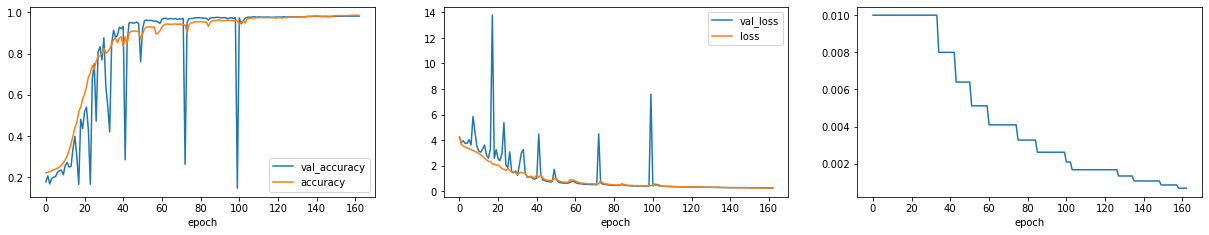

In [4]:
# Check history

history_path = model_path / 'history.csv'
history = pd.read_csv(history_path)

n = 3
size = 3.5
ncols = 3
w_h_scale = 2
figsize = (ncols * size * w_h_scale, size)
fig, axs = plt.subplots(nrows=n//ncols, ncols=ncols, figsize=figsize)
axs = axs.flatten()

epoch_start = 0
axs[0].plot(history['val_accuracy'][epoch_start:], label='val_accuracy')
axs[0].plot(history['accuracy'][epoch_start:], label='accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(history['val_loss'][epoch_start:], label='val_loss')
axs[1].plot(history['loss'][epoch_start:], label='loss')
axs[1].set_xlabel('epoch')
axs[1].legend()

axs[2].plot(history['lr'][epoch_start:])
axs[2].set_xlabel('epoch')

fig.savefig(model_path / 'history.png')